In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Quick EDA

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [6]:
df['size'].nunique()

6

In [7]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Buat Dummy Variable -> kategorikal

Tidak ada NAN ditiap kolomnya

In [8]:
dfOHE = df.copy()

In [9]:
dfOHE = pd.get_dummies(dfOHE, columns = ['sex', 'smoker', 'day', 'time'])

dfOHE.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [10]:
X = dfOHE.drop(columns='tip')
y = dfOHE['tip']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state=666)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

# Error Analysis

In [14]:
Training_set = pd.concat([X_train, y_train], axis = 1)

In [15]:
pred_train = model.predict(X_train)

In [16]:
Training_set['tip_pred'] = pred_train
Training_set['Error'] = abs(Training_set['tip'] - Training_set['tip_pred'])
Training_set.sort_values('Error', ascending=False).head(10)

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip,tip_pred,Error
170,50.81,3,1,0,1,0,0,0,1,0,0,1,10.00,5.725642,4.274358
172,7.25,2,1,0,1,0,0,0,0,1,0,1,5.15,1.744947,3.405053
212,48.33,4,1,0,0,1,0,0,1,0,0,1,9.00,5.775773,3.224227
183,23.17,4,1,0,1,0,0,0,0,1,0,1,6.50,3.525998,2.974002
214,28.17,3,0,1,1,0,0,0,1,0,0,1,6.50,3.725775,2.774225
237,32.83,2,1,0,1,0,0,0,1,0,0,1,1.17,3.904723,2.734723
102,44.30,3,0,1,1,0,0,0,1,0,0,1,2.50,5.223505,2.723505
88,24.71,2,1,0,0,1,1,0,0,0,1,0,5.85,3.241362,2.608638
181,23.33,2,1,0,1,0,0,0,0,1,0,1,5.65,3.238035,2.411965
187,30.46,5,1,0,1,0,0,0,0,1,0,1,2.00,4.354311,2.354311


<Figure size 720x864 with 0 Axes>

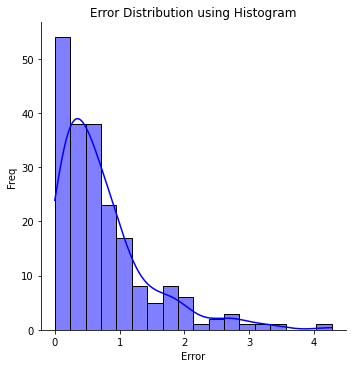

In [17]:
plt.figure(figsize=(10,12))
sns.displot(Training_set['Error'], kde=True,
color='blue')
plt.title('Error Distribution using Histogram')
plt.ylabel('Freq')
plt.show()

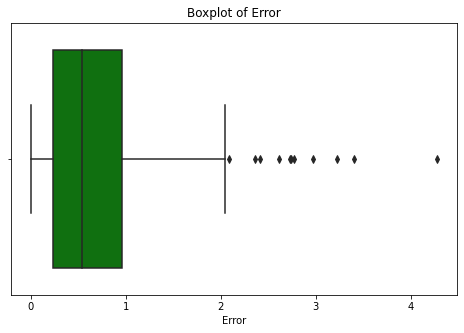

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(Training_set['Error'], color='green')
plt.title('Boxplot of Error')
plt.show()


# Evaluation Matrix Calculation

## Training Set

In [20]:
pred_train = model.predict(X_train)

In [21]:
r2_train = r2_score(y_train, pred_train)
r2_train

0.4644490889510916

In [22]:
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

0.7385374453333985

In [23]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

1.0439076194613999

In [24]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

1.0217179745220302

## Testing Set

In [25]:
pred_test = model.predict(X_test)

In [26]:
r2_test = r2_score(y_test, pred_test)
r2_test

0.4587646676241348

In [27]:
MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

0.6810775891747369

In [28]:
MSE_test = mean_squared_error(y_test, pred_test)
MSE_test

0.8788415651861736

In [29]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

0.9374655007978553

In [30]:
EvalScore = {
    'Training' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

Evaldf = pd.DataFrame(EvalScore, index=['R Squared', 'MAE', 'MSE', 'RMSE'])
Evaldf

,Training,Testing
R Squared,0.464449,0.458765
MAE,0.738537,0.681078
MSE,1.043908,0.878842
RMSE,1.021718,0.937466


- Nilai R Squared hanya 0.45, itu sangat buruk. Bisa ditingkatkan dgn melakukan feature engineer